# **Project Title - Book Recommendation System**

**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

* Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

* Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**Importing Libraries**

In [1]:
#importing libraries required for EDA
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date, datetime
from nltk.corpus import stopwords

# **User Dataset**

In [2]:
#loading user dataset
user_df = pd.read_csv('Users.csv')
#first five records of user data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
#size of the user dataset
user_df.shape

(278858, 3)

**Data Cleaning**

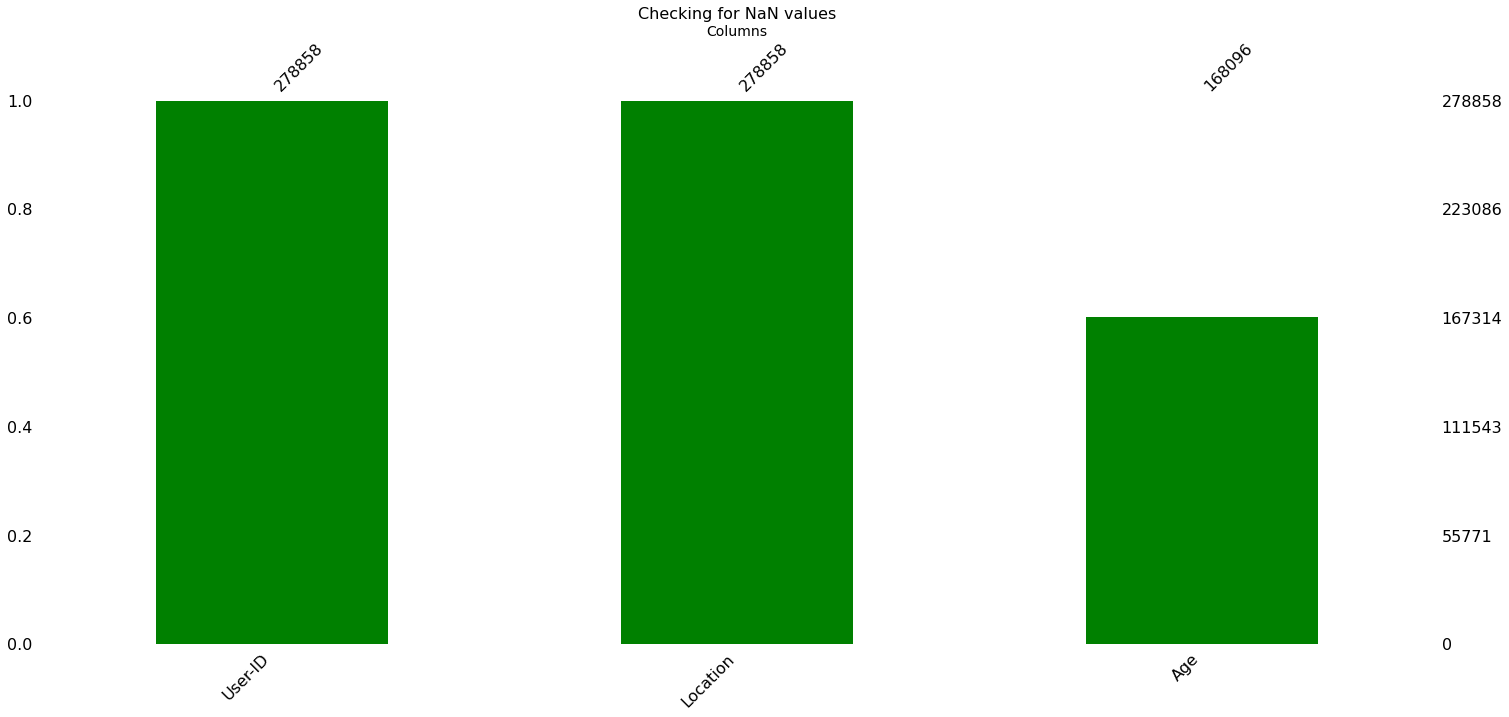

In [4]:
#checking for null values
msno.bar(user_df, color='green')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [5]:
#number of null values present in the datset
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [6]:
#filling the nan values with 0
user_df['Age'].fillna(user_df['Age'].mean(), inplace=True)

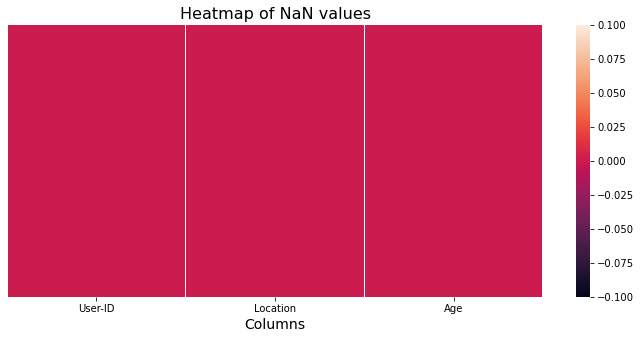

In [7]:
#heatmap of data frame showing null values
plt.figure(figsize=(12, 5))
sns.heatmap(user_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [8]:
#number of unique values 
user_df.nunique()

User-ID     278858
Location     57339
Age            166
dtype: int64

**Data Visualizartion**

**Analysis on Location Feature**

In [9]:
#analysis of location feature
#dictionary of location
location_dict = {}

#extracting the words
for loc in user_df['Location']:
    for name in loc.split(', '):
        if name in location_dict:
            location_dict[name] = location_dict[name]+1
        else:
            location_dict[name] = 1

In [10]:
#dataframe of location and their counts
location_df = pd.DataFrame(location_dict.items(), columns=['Location', 'Count']).sort_values('Count', ascending=False)
#frequent locations
location_df.head()

,Location,Count
2,usa,139737
19,canada,21668
4,california,19896
13,united kingdom,18592
48,germany,17088


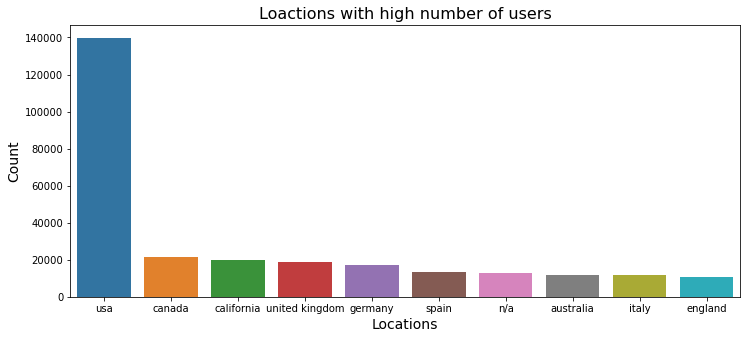

In [11]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=location_df['Location'][:10], y=location_df['Count'][:10])
plt.title('Loactions with high number of users', size=16)
plt.xlabel('Locations', size=14)
plt.ylabel('Count', size=14)
plt.show()

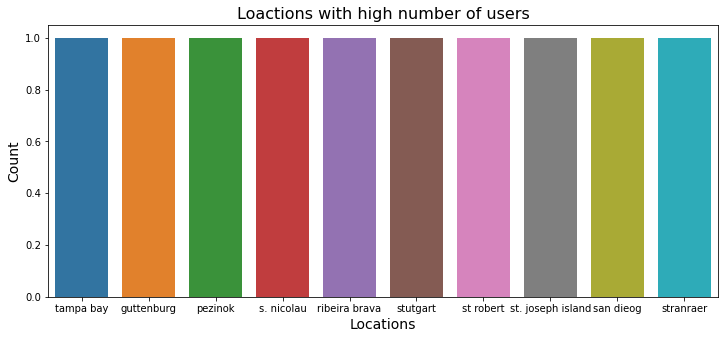

In [12]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=location_df['Location'][-10:], y=location_df['Count'][-10:])
plt.title('Loactions with high number of users', size=16)
plt.xlabel('Locations', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Analysis of Age**

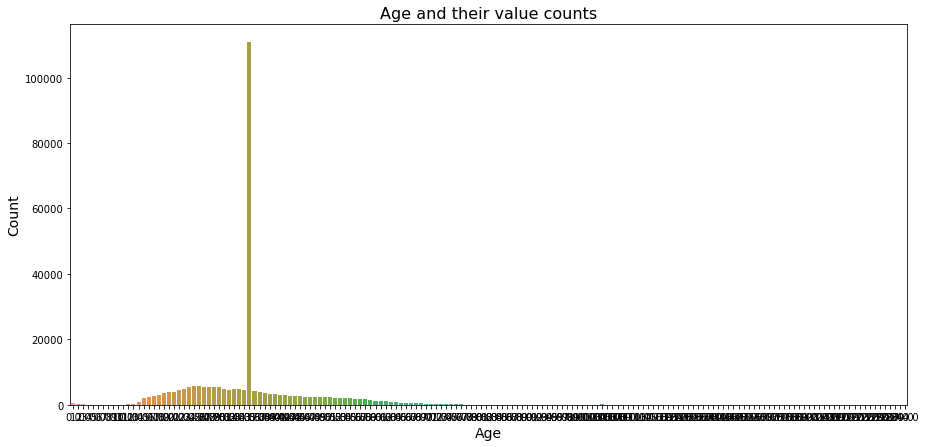

In [13]:
#plotting the time type data
plt.figure(figsize=(15, 7))
sns.countplot(user_df['Age'])
plt.title('Age and their value counts', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

# **Books Dataset**

In [14]:
#loading book dataset
book_df = pd.read_csv('Books.csv')
#first 5 records of the data
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [15]:
#size of the book dataset
book_df.shape

(271360, 8)

In [16]:
#showing the datatypes of features
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [17]:
#removing the improper type of data
book_df = book_df[~book_df['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
#converting the datatype
book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype(int)

**Data Cleaning**

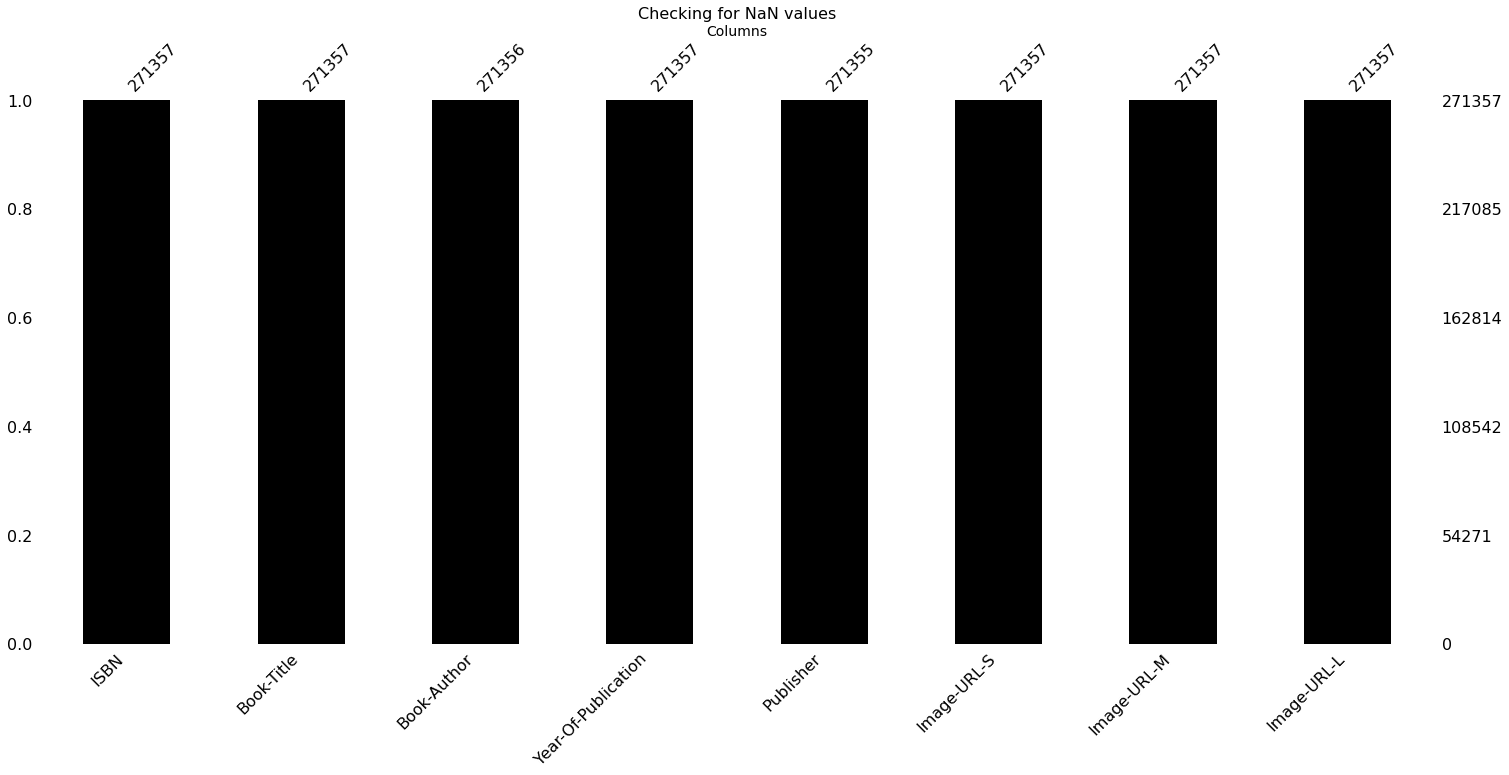

In [18]:
#checking for null values
msno.bar(book_df, color='black')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [19]:
#dropping the nan values
book_df.dropna(inplace=True)

In [20]:
#size of the dataset after cleaning of null values
book_df.shape

(271354, 8)

In [21]:
#number of null values present in the datset after dropping nan values
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

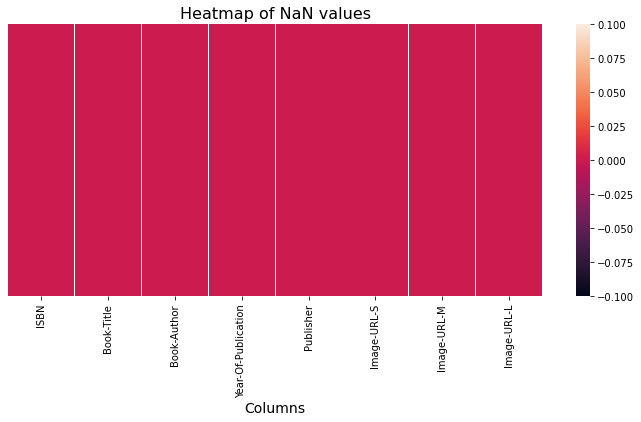

In [22]:
#heatmap of data frame showing null values
plt.figure(figsize=(12, 5))
sns.heatmap(book_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Data Visualizartion**

In [23]:
#number of unique values 
book_df.nunique()

ISBN                   271354
Book-Title             242130
Book-Author            102020
Year-Of-Publication       116
Publisher               16803
Image-URL-S            271038
Image-URL-M            271038
Image-URL-L            271038
dtype: int64

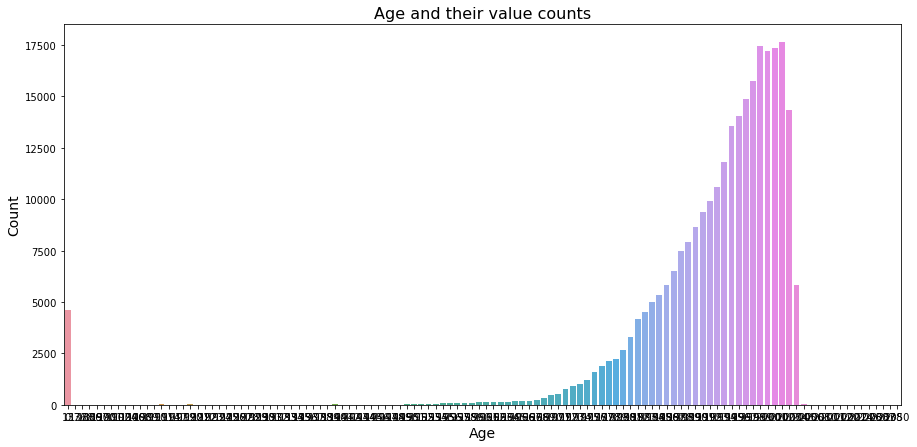

In [24]:
#plotting the Age type data
plt.figure(figsize=(15, 7))
sns.countplot(book_df['Year-Of-Publication'])
plt.title('Age and their value counts', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [25]:
#dropping unwanted columns
del(book_df['Image-URL-S'])
del(book_df['Image-URL-M'])
del(book_df['Image-URL-L'])

# **Ratings Dataset**

In [26]:
#loading ratings dataset
ratings_df = pd.read_csv('Ratings.csv')
#first 5 records of the dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [27]:
#size of the ratings dataset
ratings_df.shape

(1149780, 3)

**Data Cleaning**

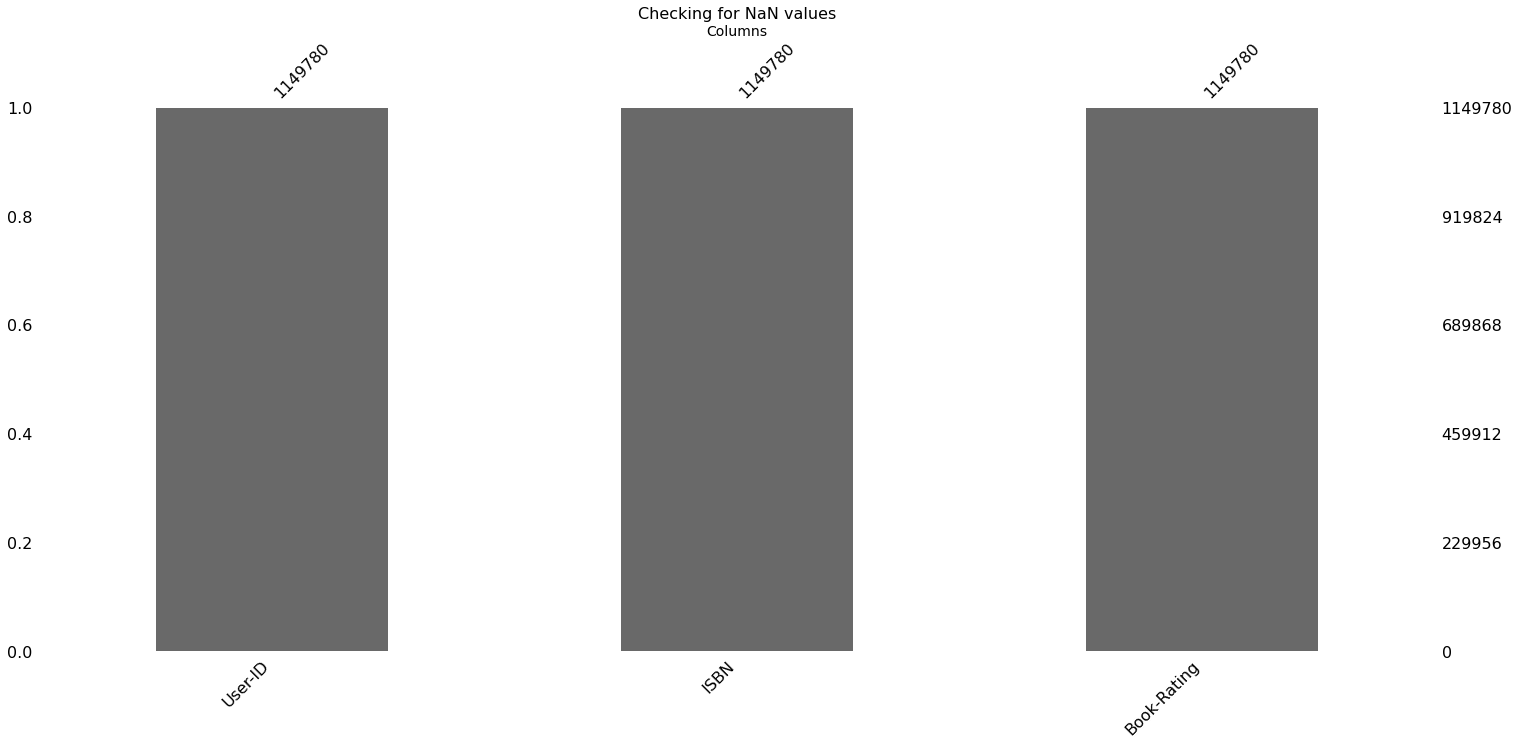

In [28]:
#checking for null values
msno.bar(ratings_df)
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [29]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**Data Visualization**

In [30]:
#number of unique values 
ratings_df.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

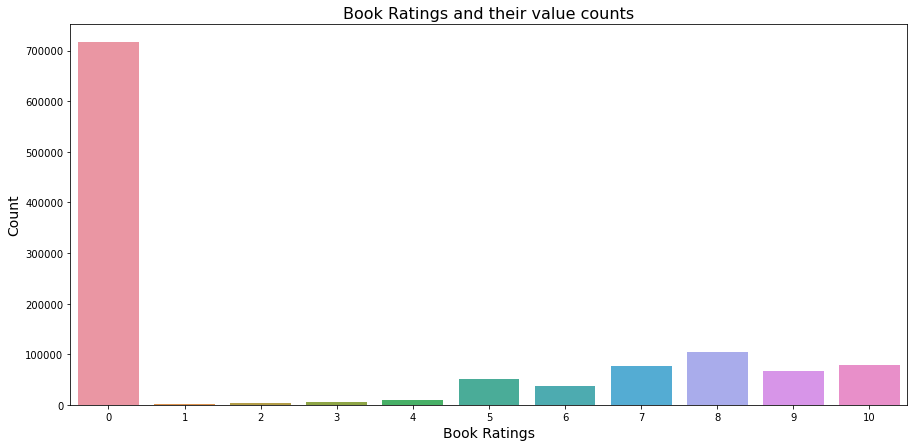

In [31]:
#plotting the time type data
plt.figure(figsize=(15, 7))
sns.countplot(ratings_df['Book-Rating'])
plt.title('Book Ratings and their value counts', size=16)
plt.xlabel('Book Ratings', size=14)
plt.ylabel('Count', size=14)
plt.show()

# **User Ratings Dataset**

In [32]:
#combining the user and ratings datasets
user_ratings_df = ratings_df.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')
#first  records of merged dataset
user_ratings_df.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",34.751434
1,276726,0155061224,5,"seattle, washington, usa",34.751434
2,276727,0446520802,0,"h, new south wales, australia",16.000000
3,276729,052165615X,3,"rijeka, n/a, croatia",16.000000
4,276729,0521795028,6,"rijeka, n/a, croatia",16.000000


In [33]:
#checking for nan values
user_ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Location       0
Age            0
dtype: int64

# **Book User Ratings Dataset**

In [34]:
#combining the user and ratings datasets
data = user_ratings_df.merge(book_df, left_on = 'ISBN', right_on = 'ISBN')
#first  records of merged dataset
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",34.751434,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.000000,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.000000,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.000000,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",34.751434,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [35]:
data = data[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
data.reset_index(drop=True, inplace=True)
data = data.iloc[:100000, :]
data.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,034545104X,Flesh Tones: A Novel,M. J. Rose,276725,0
1,034545104X,Flesh Tones: A Novel,M. J. Rose,2313,5
2,034545104X,Flesh Tones: A Novel,M. J. Rose,6543,0
3,034545104X,Flesh Tones: A Novel,M. J. Rose,8680,5
4,034545104X,Flesh Tones: A Novel,M. J. Rose,10314,9


# **Recommendation Model**

In [36]:
book_rec = data.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
book_rec

Book-Title,007 El Mundo Nunca Es Suficiente,01-01-00: The Novel of the Millennium,101 Dalmatians,101 Experiments in the Philosophy of Everyday Life,101 Great Resumes,1421 : The Year China Discovered America,1st to Die: A Novel,21 Dog Years : Doing Time @ Amazon.com,24 Hours,"28 Barbary Lane : A \Tales of the City\"" Omnibus""",...,"You're Not Elected, Charlie Brown",Your Finances in Changing Times (The Christian Financial Concepts Series),"Your Life in Your Hands: Understanding, Preventing and Overcoming Breast Cancer",Your Personal Trainer,Your Second Child,Zen Essence : The Science of Freedom (Shambhala Pocket Classics),"Zentak, tome 1 : La Passe des Argonautes",Zuiderkruis: Roman,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2)
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
